# Netflix Content Analysis: Exploring Country Distribution and Title Durations

This project delves into the Netflix content library to understand the distribution of titles across different countries and to identify the longest movies and TV shows available. Through data cleaning, feature engineering, and visualization, we aim to uncover key insights into Netflix's content offerings.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
netflix = pd.read_csv('/content/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Visualize Top Titles by Duration

Top 10 Movies by Duration (in minutes):
                            title  duration_minutes
4253   Black Mirror: Bandersnatch             312.0
717   Headspace: Unwind Your Mind             273.0
2491       The School of Mischief             253.0
2487               No Longer kids             237.0
2484           Lock Your Girls In             233.0
2488              Raya and Sakina             230.0
166   Once Upon a Time in America             229.0
7932                       Sangam             228.0
1019                       Lagaan             224.0
4573                 Jodhaa Akbar             214.0

Top 10 TV Shows by Duration (in seasons):
                       title  duration_seasons
548           Grey's Anatomy              17.0
4798                    NCIS              15.0
2423            Supernatural              15.0
4220  COMEDIANS of the world              13.0
1354               Heartland              13.0
7847            Red vs. Blue              13.0
5412          Cr

/tmp/ipython-input-629812241.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='duration_minutes', data=top_10_movies_duration, palette='viridis')


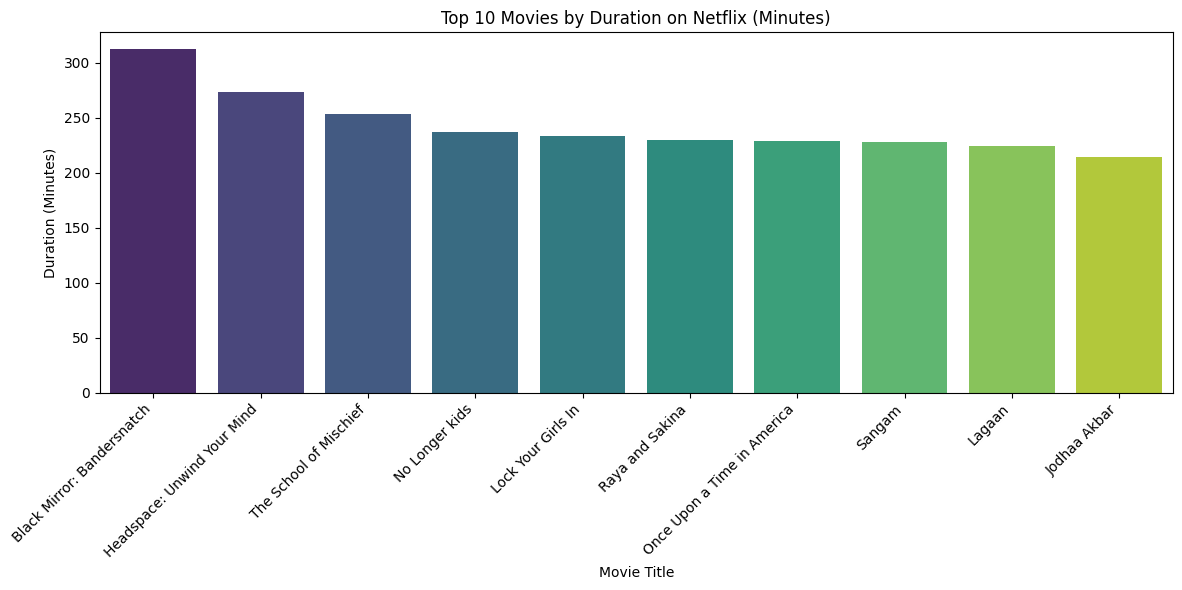

/tmp/ipython-input-629812241.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='title', y='duration_seasons', data=top_10_tvshows_duration, palette='magma')


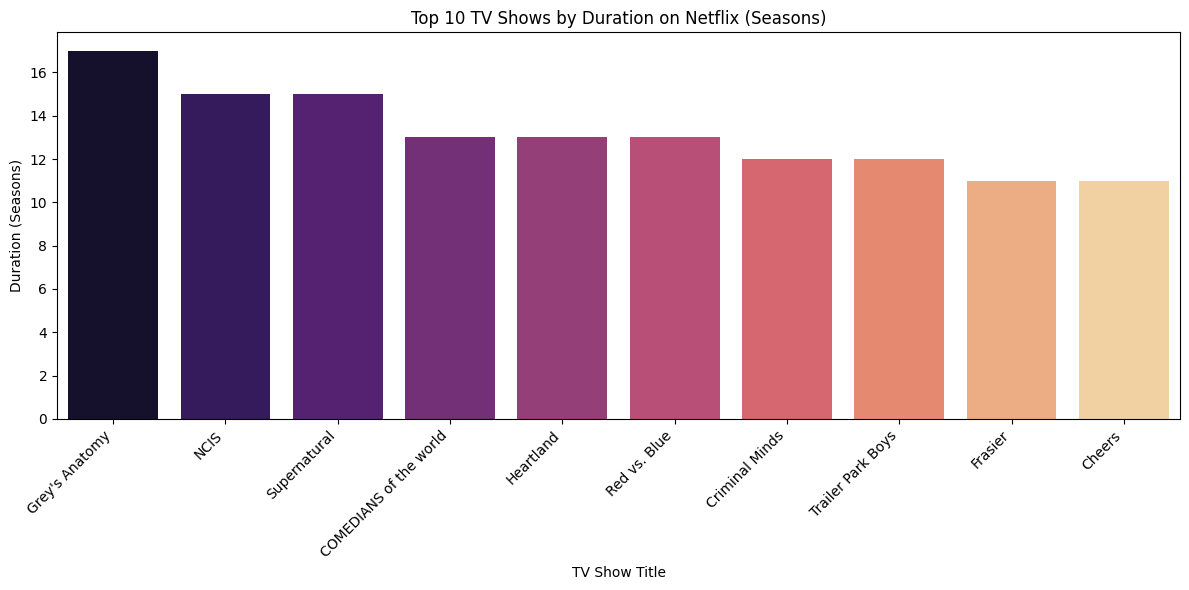

In [ ]:
# Get top 10 movies by duration in minutes
top_10_movies_duration = netflix_countries[netflix_countries['type'] == 'Movie'].sort_values(by='duration_minutes', ascending=False).drop_duplicates(subset=['title']).head(10)

# Get top 10 TV shows by duration in seasons
top_10_tvshows_duration = netflix_countries[netflix_countries['type'] == 'TV Show'].sort_values(by='duration_seasons', ascending=False).drop_duplicates(subset=['title']).head(10)

print("Top 10 Movies by Duration (in minutes):")
print(top_10_movies_duration[['title', 'duration_minutes']])

print("\nTop 10 TV Shows by Duration (in seasons):")
print(top_10_tvshows_duration[['title', 'duration_seasons']])

# Plotting Top 10 Movies by Duration
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration_minutes', data=top_10_movies_duration, palette='viridis')
plt.title('Top 10 Movies by Duration on Netflix (Minutes)')
plt.xlabel('Movie Title')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Top 10 TV Shows by Duration
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='duration_seasons', data=top_10_tvshows_duration, palette='magma')
plt.title('Top 10 TV Shows by Duration on Netflix (Seasons)')
plt.xlabel('TV Show Title')
plt.ylabel('Duration (Seasons)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Feature Engineering: Extracting Numerical Duration

In [ ]:
# Initialize new duration columns
netflix_countries['duration_minutes'] = np.nan
netflix_countries['duration_seasons'] = np.nan

# Process movie durations
movies_mask = netflix_countries['duration'].str.contains('min', na=False)
netflix_countries.loc[movies_mask, 'duration_minutes'] = netflix_countries.loc[movies_mask, 'duration'].str.extract(r'(\d+)', expand=False).astype(float)

# Process TV show durations
tv_shows_mask = netflix_countries['duration'].str.contains('Season', na=False)
netflix_countries.loc[tv_shows_mask, 'duration_seasons'] = netflix_countries.loc[tv_shows_mask, 'duration'].str.extract(r'(\d+)', expand=False).astype(float)

print("First 5 rows with 'duration_minutes' values:")
print(netflix_countries[movies_mask].dropna(subset=['duration_minutes']).head()[['title', 'type', 'duration', 'duration_minutes']])

print("\nFirst 5 rows with 'duration_seasons' values:")
print(netflix_countries[tv_shows_mask].dropna(subset=['duration_seasons']).head()[['title', 'type', 'duration', 'duration_seasons']])

# Check for any remaining unparsed durations
unparsed_durations = netflix_countries[netflix_countries['duration_minutes'].isnull() & netflix_countries['duration_seasons'].isnull()]['duration'].unique()

if len(unparsed_durations) > 0:
    print(f"\nUnparsed durations (if any): {unparsed_durations}")
else:
    print("\nAll durations were successfully parsed.")

First 5 rows with 'duration_minutes' values:
                              title   type duration  duration_minutes
0              Dick Johnson Is Dead  Movie   90 min              90.0
6  My Little Pony: A New Generation  Movie   91 min              91.0
7                           Sankofa  Movie  125 min             125.0
7                           Sankofa  Movie  125 min             125.0
7                           Sankofa  Movie  125 min             125.0

First 5 rows with 'duration_seasons' values:
                   title     type   duration  duration_seasons
1          Blood & Water  TV Show  2 Seasons               2.0
2              Ganglands  TV Show   1 Season               1.0
3  Jailbirds New Orleans  TV Show   1 Season               1.0
4           Kota Factory  TV Show  2 Seasons               2.0
5          Midnight Mass  TV Show   1 Season               1.0

Unparsed durations (if any): [nan]


## Analyze 'country' column and handle missing values


In [ ]:
print(f"Number of missing values in 'country' column: {netflix['country'].isnull().sum()}\n")

print("Rows with missing 'country' values (first 5 rows):")
print(netflix[netflix['country'].isnull()].head())

print("\nRows with multiple countries (first 5 rows):")
print(netflix[netflix['country'].str.contains(',', na=False)].head())

Number of missing values in 'country' column: 831

Rows with missing 'country' values (first 5 rows):
   show_id     type                                title  \
2       s3  TV Show                            Ganglands   
3       s4  TV Show                Jailbirds New Orleans   
5       s6  TV Show                        Midnight Mass   
6       s7    Movie     My Little Pony: A New Generation   
10     s11  TV Show  Vendetta: Truth, Lies and The Mafia   

                         director  \
2                 Julien Leclercq   
3                             NaN   
5                   Mike Flanagan   
6   Robert Cullen, José Luis Ucha   
10                            NaN   

                                                 cast country  \
2   Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...     NaN   
3                                                 NaN     NaN   
5   Kate Siegel, Zach Gilford, Hamish Linklater, H...     NaN   
6   Vanessa Hudgens, Kimiko Glenn, James Marsden, ... 

In [ ]:
netflix['country'].fillna('Unknown', inplace=True)

# Expand rows with multiple countries into separate rows
netflix_countries = netflix.assign(country = netflix['country'].str.split(', ')).explode('country')

print("First 5 rows of netflix_countries DataFrame after handling missing values and expanding countries:")
print(netflix_countries.head())

First 5 rows of netflix_countries DataFrame after handling missing values and expanding countries:
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...        Unknown   
3                                                NaN        Unknown   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13  

## Extract and count titles per country


In [ ]:
country_counts = netflix_countries.groupby('country')['show_id'].nunique().sort_values(ascending=False)

print("Top 10 countries by number of titles:\n")
print(country_counts.head(10))

Top 10 countries by number of titles:

country
United States     3689
India             1046
Unknown            831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Name: show_id, dtype: int64


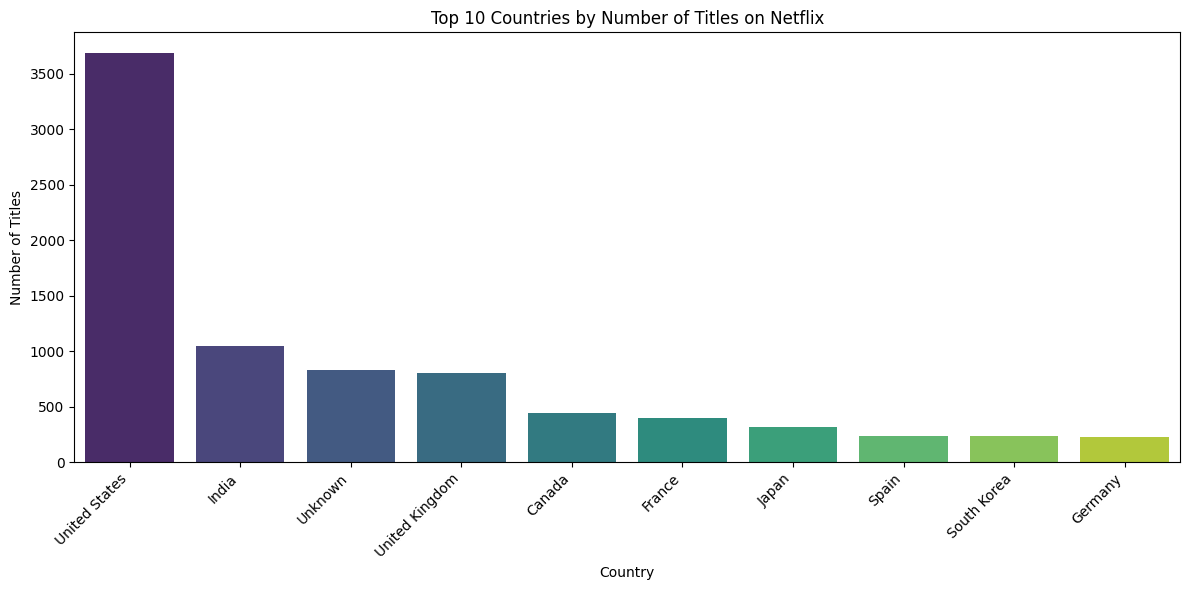

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.head(10).index, y=country_counts.head(10).values, hue=country_counts.head(10).index, palette='viridis', legend=False)
plt.title('Top 10 Countries by Number of Titles on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

##Conclusion

*   **Country Distribution**: The United States leads significantly in the number of titles (3689), followed by India (1046) and the United Kingdom (804). A substantial number of titles (831) had unassigned countries, which were categorized as 'Unknown'.
*   **Longest Movies**: The top 10 longest movies ranged from 214 minutes ('Jodhaa Akbar') to 312 minutes ('Black Mirror: Bandersnatch').
*   **Longest TV Shows**: The top 10 longest TV shows ranged from 11 seasons ('Frasier', 'Cheers') to 17 seasons ('Grey's Anatomy').
*   **Data Cleaning**: Missing 'country' values were filled with 'Unknown'. Entries with multiple countries were expanded into separate rows for accurate counting.
*   **Feature Engineering**: Numerical `duration_minutes` and `duration_seasons` columns were successfully created by extracting numerical data from the 'duration' string column.
*   **Visualization**: Bar plots effectively displayed the top countries by title count, and the top 10 movies and TV shows by duration.